In [10]:
import sys
sys.path.append('..')

In [11]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from pennylane import numpy as np
data = np.loadtxt("../data/PennyLane/parity.txt")
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - np.ones(len(Y))  # shift label from {0, 1} to {-1, 1}
X.requires_grad = False
Y.requires_grad = False
data = [X, Y]

for i in range(5):
    print("X = {}, Y = {: d}".format(X[i], int(Y[i])))

print("...")

X = [0. 0. 0. 0.], Y = -1
X = [0. 0. 0. 1.], Y =  1
X = [0. 0. 1. 0.], Y =  1
X = [0. 0. 1. 1.], Y = -1
X = [0. 1. 0. 0.], Y =  1
...


In [13]:
print(X)
print(Y)

[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]
[-1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.]


In [14]:
X, Y, X_validation, Y_validation = f.create_validating_set(X, Y, percentage=0.2)

data = [X, Y]
data_validation = [X_validation, Y_validation]

In [15]:
circuit_layers = [
    layers.basis_preparation(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.mesurament(qubits=[0])
]

In [16]:
sign = lambda x: 1 if x >= 0 else -1
    
S = m.score_predictor(
    n_qubits = 4, 
    data = data, 
    data_validation = data_validation, 
    circuit_layers = circuit_layers, 
    output_to_prediction = sign
)


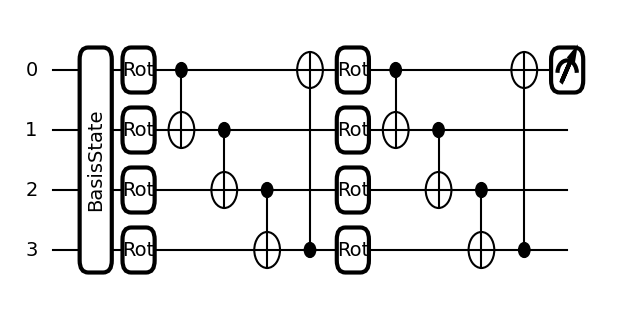

In [17]:
S.draw_circuit()

1.0
Iter:    30 | Cost: 0.0002562 | Accuracy: 1.0000000 | Accuracy validation: 1.0000000


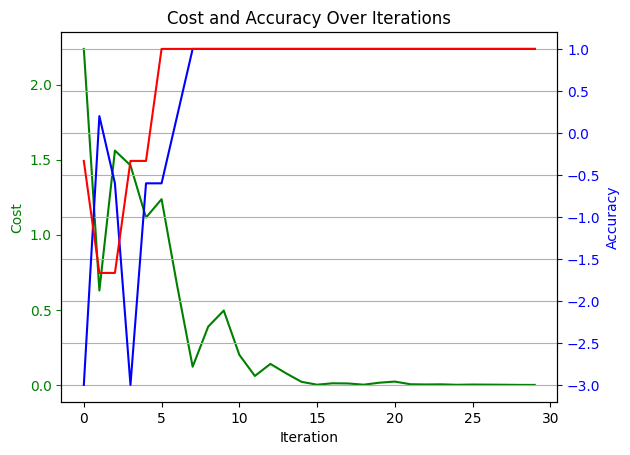

In [18]:
S.train(30)